# Electric Vehicle Range Prediction - Regression Analysis

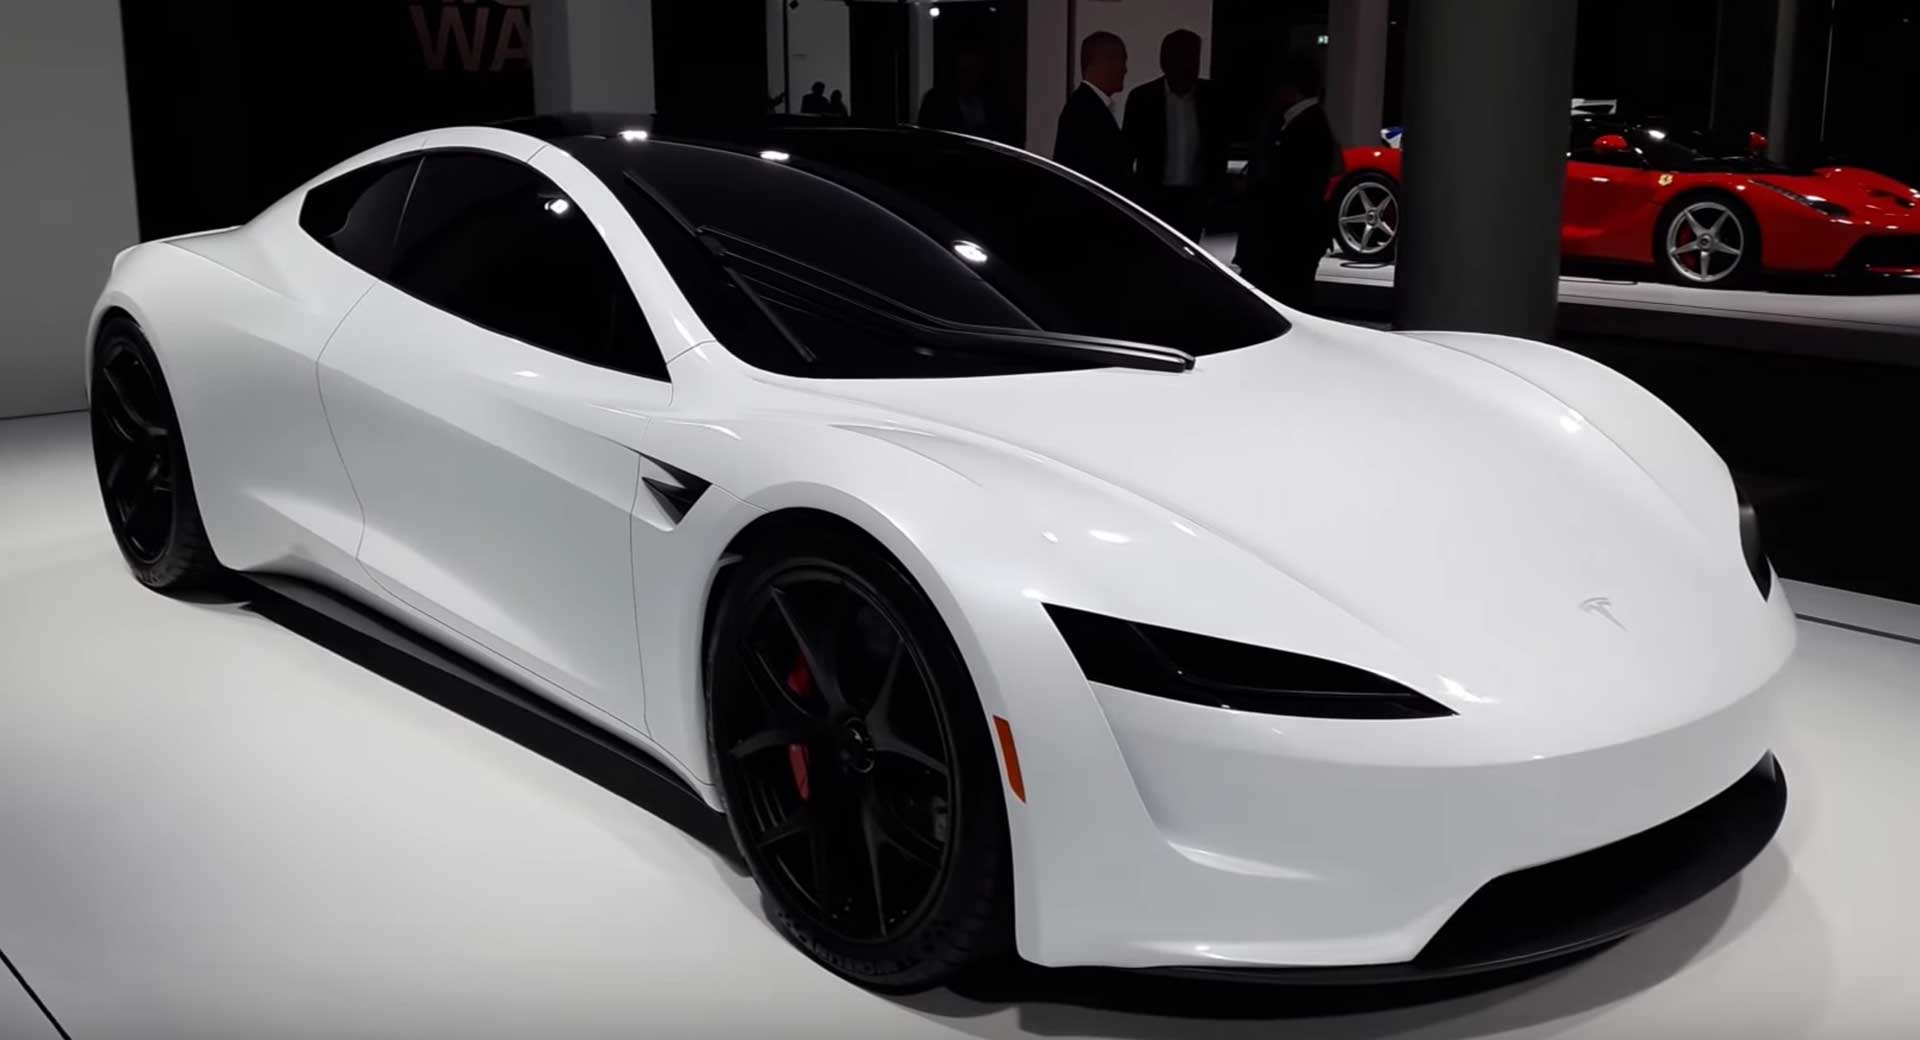

# Introduction

For drivers of electric vehicles (EVs), range is a primary focus. As EVs become more popular, drivers want to know not just “How far can I go?” but also “How can I go further?”  EV range, put simply, is the distance a car can travel on a single charge. 

In this notebook, I explore the EV cars dataset and develop Regression to try estimate EV range.

In [1]:
#Importing the Libraries and data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load Data

In [2]:
# Import the CSV file 
# Print the Top five rows of the dataset
ev = pd.read_csv('/kaggle/input/evs-one-electric-vehicle-dataset/ElectricCarData_Clean.csv')
ev.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


# 2.Explore Data (Exploratory Data Analysis) 

In [3]:
#Check available features
ev.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [4]:
#Full summary of the dataset
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [5]:
#Check the number of rows and columns
ev.shape

(103, 14)

In [6]:
#Check missing value
ev.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

There exists no null value

In [7]:
#Check data type of each column
ev.dtypes

Brand               object
Model               object
AccelSec           float64
TopSpeed_KmH         int64
Range_Km             int64
Efficiency_WhKm      int64
FastCharge_KmH      object
RapidCharge         object
PowerTrain          object
PlugType            object
BodyStyle           object
Segment             object
Seats                int64
PriceEuro            int64
dtype: object

In [8]:
#Check the unique values of the dataset
ev.nunique()

Brand               33
Model              102
AccelSec            55
TopSpeed_KmH        25
Range_Km            50
Efficiency_WhKm     54
FastCharge_KmH      51
RapidCharge          2
PowerTrain           3
PlugType             4
BodyStyle            9
Segment              8
Seats                5
PriceEuro           87
dtype: int64

In [9]:
#Descriptive Statistics of the dataset
ev.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

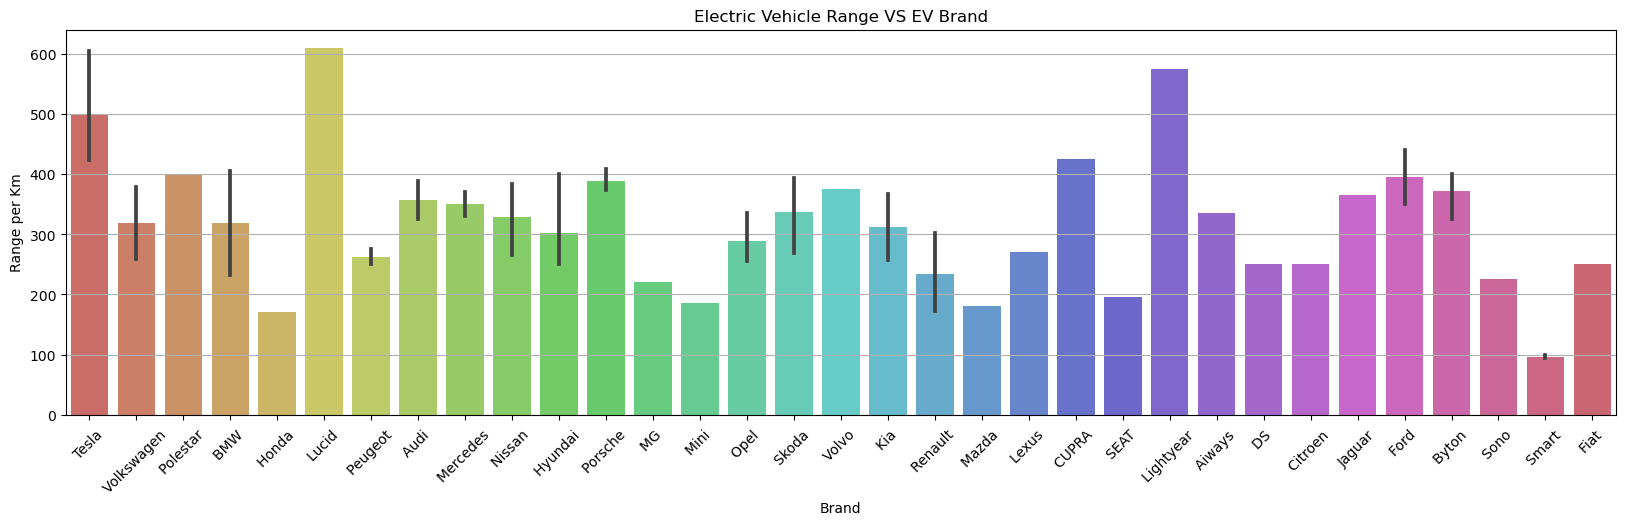

In [10]:
#Analysis range by EV Brand
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Range_Km',data=ev,palette='hls')
plt.grid(axis='y')
plt.title('Electric Vehicle Range VS EV Brand')
plt.xlabel('Brand')
plt.ylabel('Range per Km')
plt.xticks(rotation=45)

Lightyear, Lucid and Tesla have the highest Range and Smart the lowest


# Model with highest Range

In [11]:
range_df = ev.sort_values(by=['Range_Km'], ascending=False)
range_df[['Brand','Model','Range_Km']].head(n=1)

,Brand,Model,Range_Km
51,Tesla,Roadster,970


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

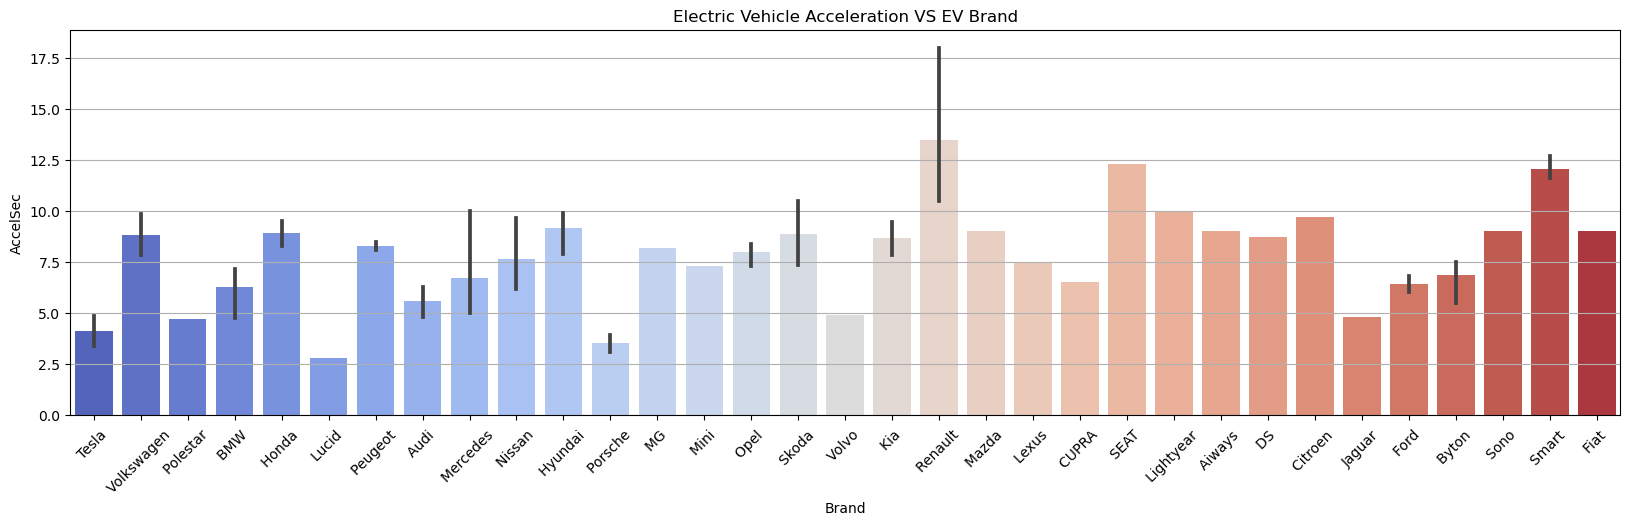

In [12]:
#Analysis acceleration by EV Brand
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='AccelSec',data=ev,palette='coolwarm')
plt.grid(axis='y')
plt.title('Electric Vehicle Acceleration VS EV Brand')
plt.xlabel('Brand')
plt.ylabel('AccelSec')
plt.xticks(rotation=45)

Lucid, Tesla and Porsche are ranking in Top 3, they can accelerate to 60 mph (97 km/h) at very short time and Renault needs the longest time.


# Model with the shortest Acceleration time

In [13]:
df = ev.sort_values(by=['AccelSec'], ascending=True)
df[['Brand','Model','AccelSec']].head(n=1)

,Brand,Model,AccelSec
51,Tesla,Roadster,2.1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

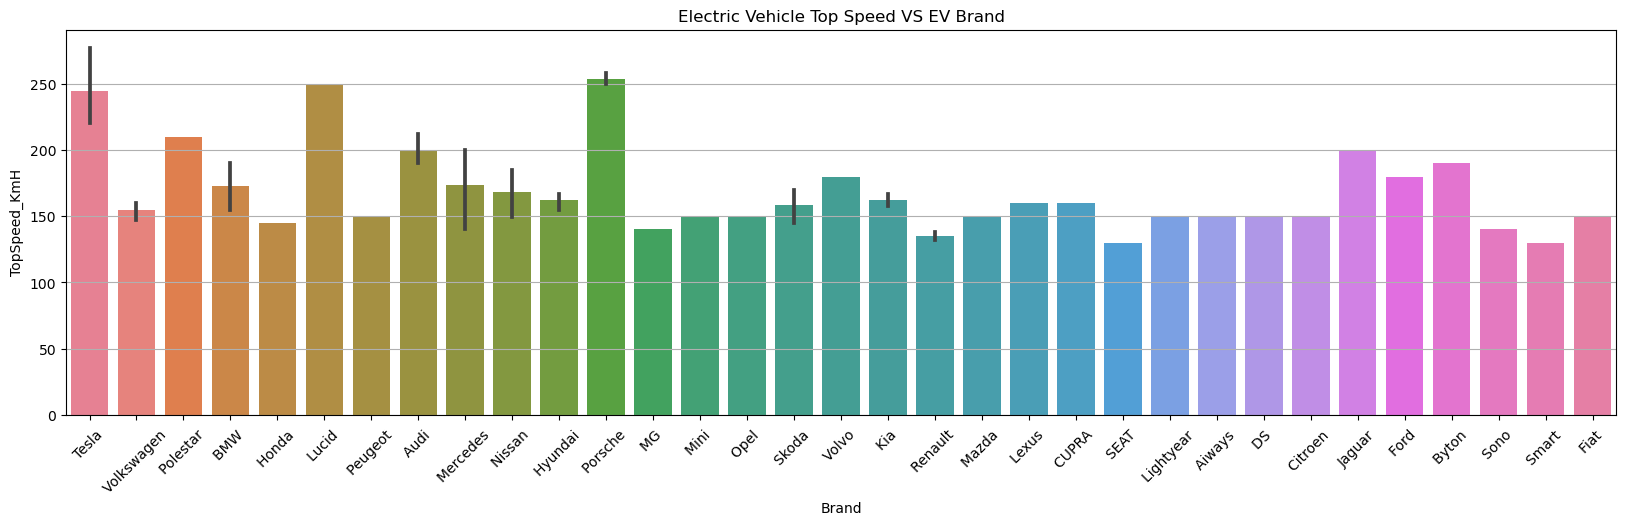

In [14]:
#Analysis top speed by EV Brand
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='TopSpeed_KmH',data=ev,palette='husl')
plt.grid(axis='y')
plt.title('Electric Vehicle Top Speed VS EV Brand')
plt.xlabel('Brand')
plt.ylabel('TopSpeed_KmH')
plt.xticks(rotation=45)

Telsa, Porsche and Lucid have the highest Speed and Seat the lowest

# Model with Top Speed

In [15]:
speed_df = ev.sort_values(by=['TopSpeed_KmH'], ascending=False)
speed_df[['Brand','Model','TopSpeed_KmH']].head(n=1)

,Brand,Model,TopSpeed_KmH
51,Tesla,Roadster,410


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

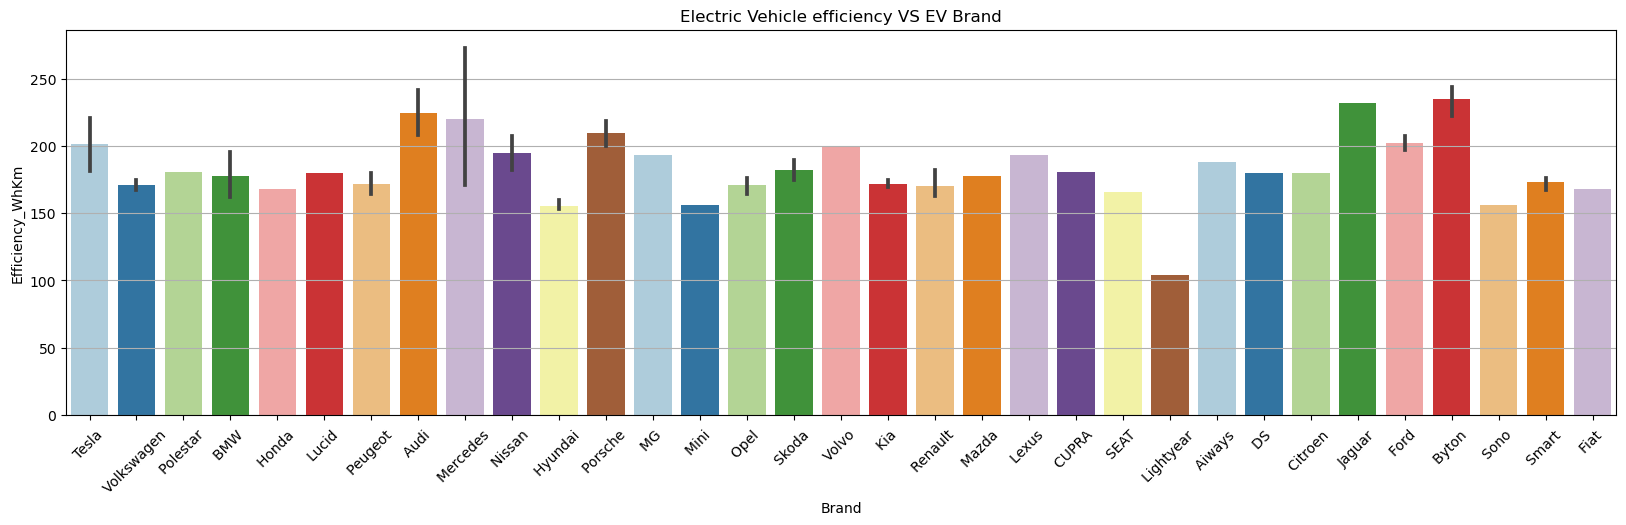

In [16]:
#Analysis efficiency by EV Brand
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Efficiency_WhKm',data=ev,palette='Paired')
plt.grid(axis='y')
plt.title('Electric Vehicle efficiency VS EV Brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency_WhKm')
plt.xticks(rotation=45)

Mercedes, Audi and Byton have the highest efficiency and Lightyear the lowest

# Model with maximum Efficiency

In [17]:
eff_df = ev.sort_values(by=['Efficiency_WhKm'], ascending=False)
eff_df[['Brand','Model','Efficiency_WhKm']].head(n=1)

,Brand,Model,Efficiency_WhKm
84,Mercedes,EQV 300 Long,273


# Model with the highest Range & maximum seats 

In [18]:
seat_df = ev.sort_values(by=['Seats'], ascending=False)
seat_df[['Brand','Model','Range_Km', 'Seats']].head(n=1)

,Brand,Model,Range_Km,Seats
21,Tesla,Model Y Long Range Dual Motor,425,7


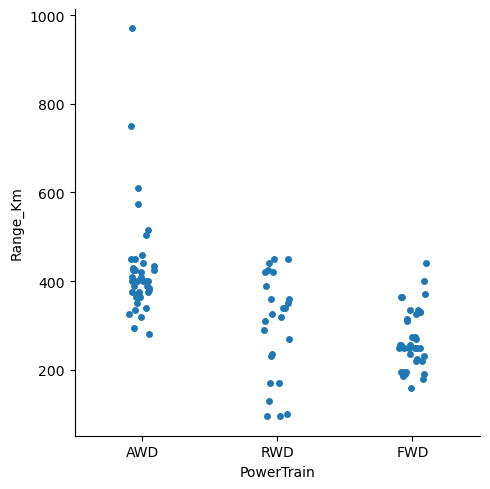

In [19]:
##Distribution of range with PowerTrain
fig, axs = plt.subplots(1,2)
sns.catplot(x="PowerTrain", y="Range_Km", data=ev)
plt.close(1)

# 3. Encoding categorical data

In [20]:
ev.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [21]:
ev1 = ev[['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']]

In [22]:
print(ev1)

# define ordinal encoding
encoder = OrdinalEncoder()

# transform data
result = encoder.fit_transform(ev1)
print(result)

           Brand                            Model PowerTrain RapidCharge  \
0         Tesla     Model 3 Long Range Dual Motor        AWD         Yes   
1    Volkswagen                         ID.3 Pure        RWD         Yes   
2      Polestar                                 2        AWD         Yes   
3           BMW                              iX3         RWD         Yes   
4         Honda                                e         RWD         Yes   
..           ...                              ...        ...         ...   
98       Nissan                       Ariya 63kWh        FWD         Yes   
99         Audi     e-tron S Sportback 55 quattro        AWD         Yes   
100      Nissan               Ariya e-4ORCE 63kWh        AWD         Yes   
101      Nissan   Ariya e-4ORCE 87kWh Performance        AWD         Yes   
102       Byton                 M-Byte 95 kWh 2WD        AWD         Yes   

       PlugType  BodyStyle Segment  
0    Type 2 CCS      Sedan       D  
1    Type 2 C

In [23]:
temp = ['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']

In [24]:
ev.drop(temp,axis=1,inplace=True)

In [25]:
result = pd.DataFrame(result)

In [26]:
result.columns=["Brand", "Model", "PowerTrain", 'RapidCharge', "PlugType", "BodyStyle", "Segment"]
result.index+=1

In [27]:
result

,Brand,Model,PowerTrain,RapidCharge,PlugType,BodyStyle,Segment
1,30.0,46.0,0.0,1.0,2.0,7.0,3.0
2,31.0,33.0,2.0,1.0,2.0,1.0,2.0
3,23.0,0.0,0.0,1.0,2.0,2.0,3.0
4,2.0,101.0,2.0,1.0,2.0,6.0,3.0
5,9.0,78.0,2.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...
99,20.0,6.0,1.0,1.0,2.0,1.0,2.0
100,1.0,94.0,0.0,1.0,2.0,6.0,4.0
101,20.0,8.0,0.0,1.0,2.0,1.0,2.0
102,20.0,10.0,0.0,1.0,2.0,1.0,2.0


In [28]:
ev1 = ev
ev1.index+=1

In [29]:
ev1[['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']] = result[['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']]
ev

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,Brand,Model,PowerTrain,RapidCharge,PlugType,BodyStyle,Segment
1,4.6,233,450,161,940,5,55480,30.0,46.0,0.0,1.0,2.0,7.0,3.0
2,10.0,160,270,167,250,5,30000,31.0,33.0,2.0,1.0,2.0,1.0,2.0
3,4.7,210,400,181,620,5,56440,23.0,0.0,0.0,1.0,2.0,2.0,3.0
4,6.8,180,360,206,560,5,68040,2.0,101.0,2.0,1.0,2.0,6.0,3.0
5,9.5,145,170,168,190,4,32997,9.0,78.0,2.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,7.5,160,330,191,440,5,45000,20.0,6.0,1.0,1.0,2.0,1.0,2.0
100,4.5,210,335,258,540,5,96050,1.0,94.0,0.0,1.0,2.0,6.0,4.0
101,5.9,200,325,194,440,5,50000,20.0,8.0,0.0,1.0,2.0,1.0,2.0
102,5.1,200,375,232,450,5,65000,20.0,10.0,0.0,1.0,2.0,1.0,2.0


In [30]:
#Check correlation between different features
ev.corr()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro,Brand,Model,PowerTrain,RapidCharge,PlugType,BodyStyle,Segment
AccelSec,1.000000,-0.786195,-0.677062,-0.382904,-0.175335,-0.627174,0.062730,-0.050635,0.521011,-0.514820,-0.259657,-0.347164,-0.451568
TopSpeed_KmH,-0.786195,1.000000,0.746662,0.355675,0.126470,0.829057,0.101759,0.067814,-0.560538,0.251054,-0.010110,0.339230,0.670403
Range_Km,-0.677062,0.746662,1.000000,0.313077,0.300163,0.674844,0.088316,-0.066035,-0.451495,0.401290,0.131297,0.227477,0.628597
Efficiency_WhKm,-0.382904,0.355675,0.313077,1.000000,0.301230,0.396705,-0.195901,0.010976,-0.394721,0.105673,-0.028761,0.373146,0.623263
Seats,-0.175335,0.126470,0.300163,0.301230,1.000000,0.020920,0.089589,-0.018943,-0.278882,0.423111,-0.029570,0.342489,0.416744
PriceEuro,-0.627174,0.829057,0.674844,0.396705,0.020920,1.000000,-0.036023,0.169003,-0.561584,0.197208,-0.000193,0.321713,0.737106
Brand,0.062730,0.101759,0.088316,-0.195901,0.089589,-0.036023,1.000000,-0.401572,0.056464,-0.188137,-0.231104,-0.275860,-0.002040
Model,-0.050635,0.067814,-0.066035,0.010976,-0.018943,0.169003,-0.401572,1.000000,-0.007609,0.144293,0.023750,0.261255,0.068414
PowerTrain,0.521011,-0.560538,-0.451495,-0.394721,-0.278882,-0.561584,0.056464,-0.007609,1.000000,-0.274797,-0.039763,-0.349484,-0.497850
RapidCharge,-0.514820,0.251054,0.401290,0.105673,0.423111,0.197208,-0.188137,0.144293,-0.274797,1.000000,0.539160,0.223577,0.189954


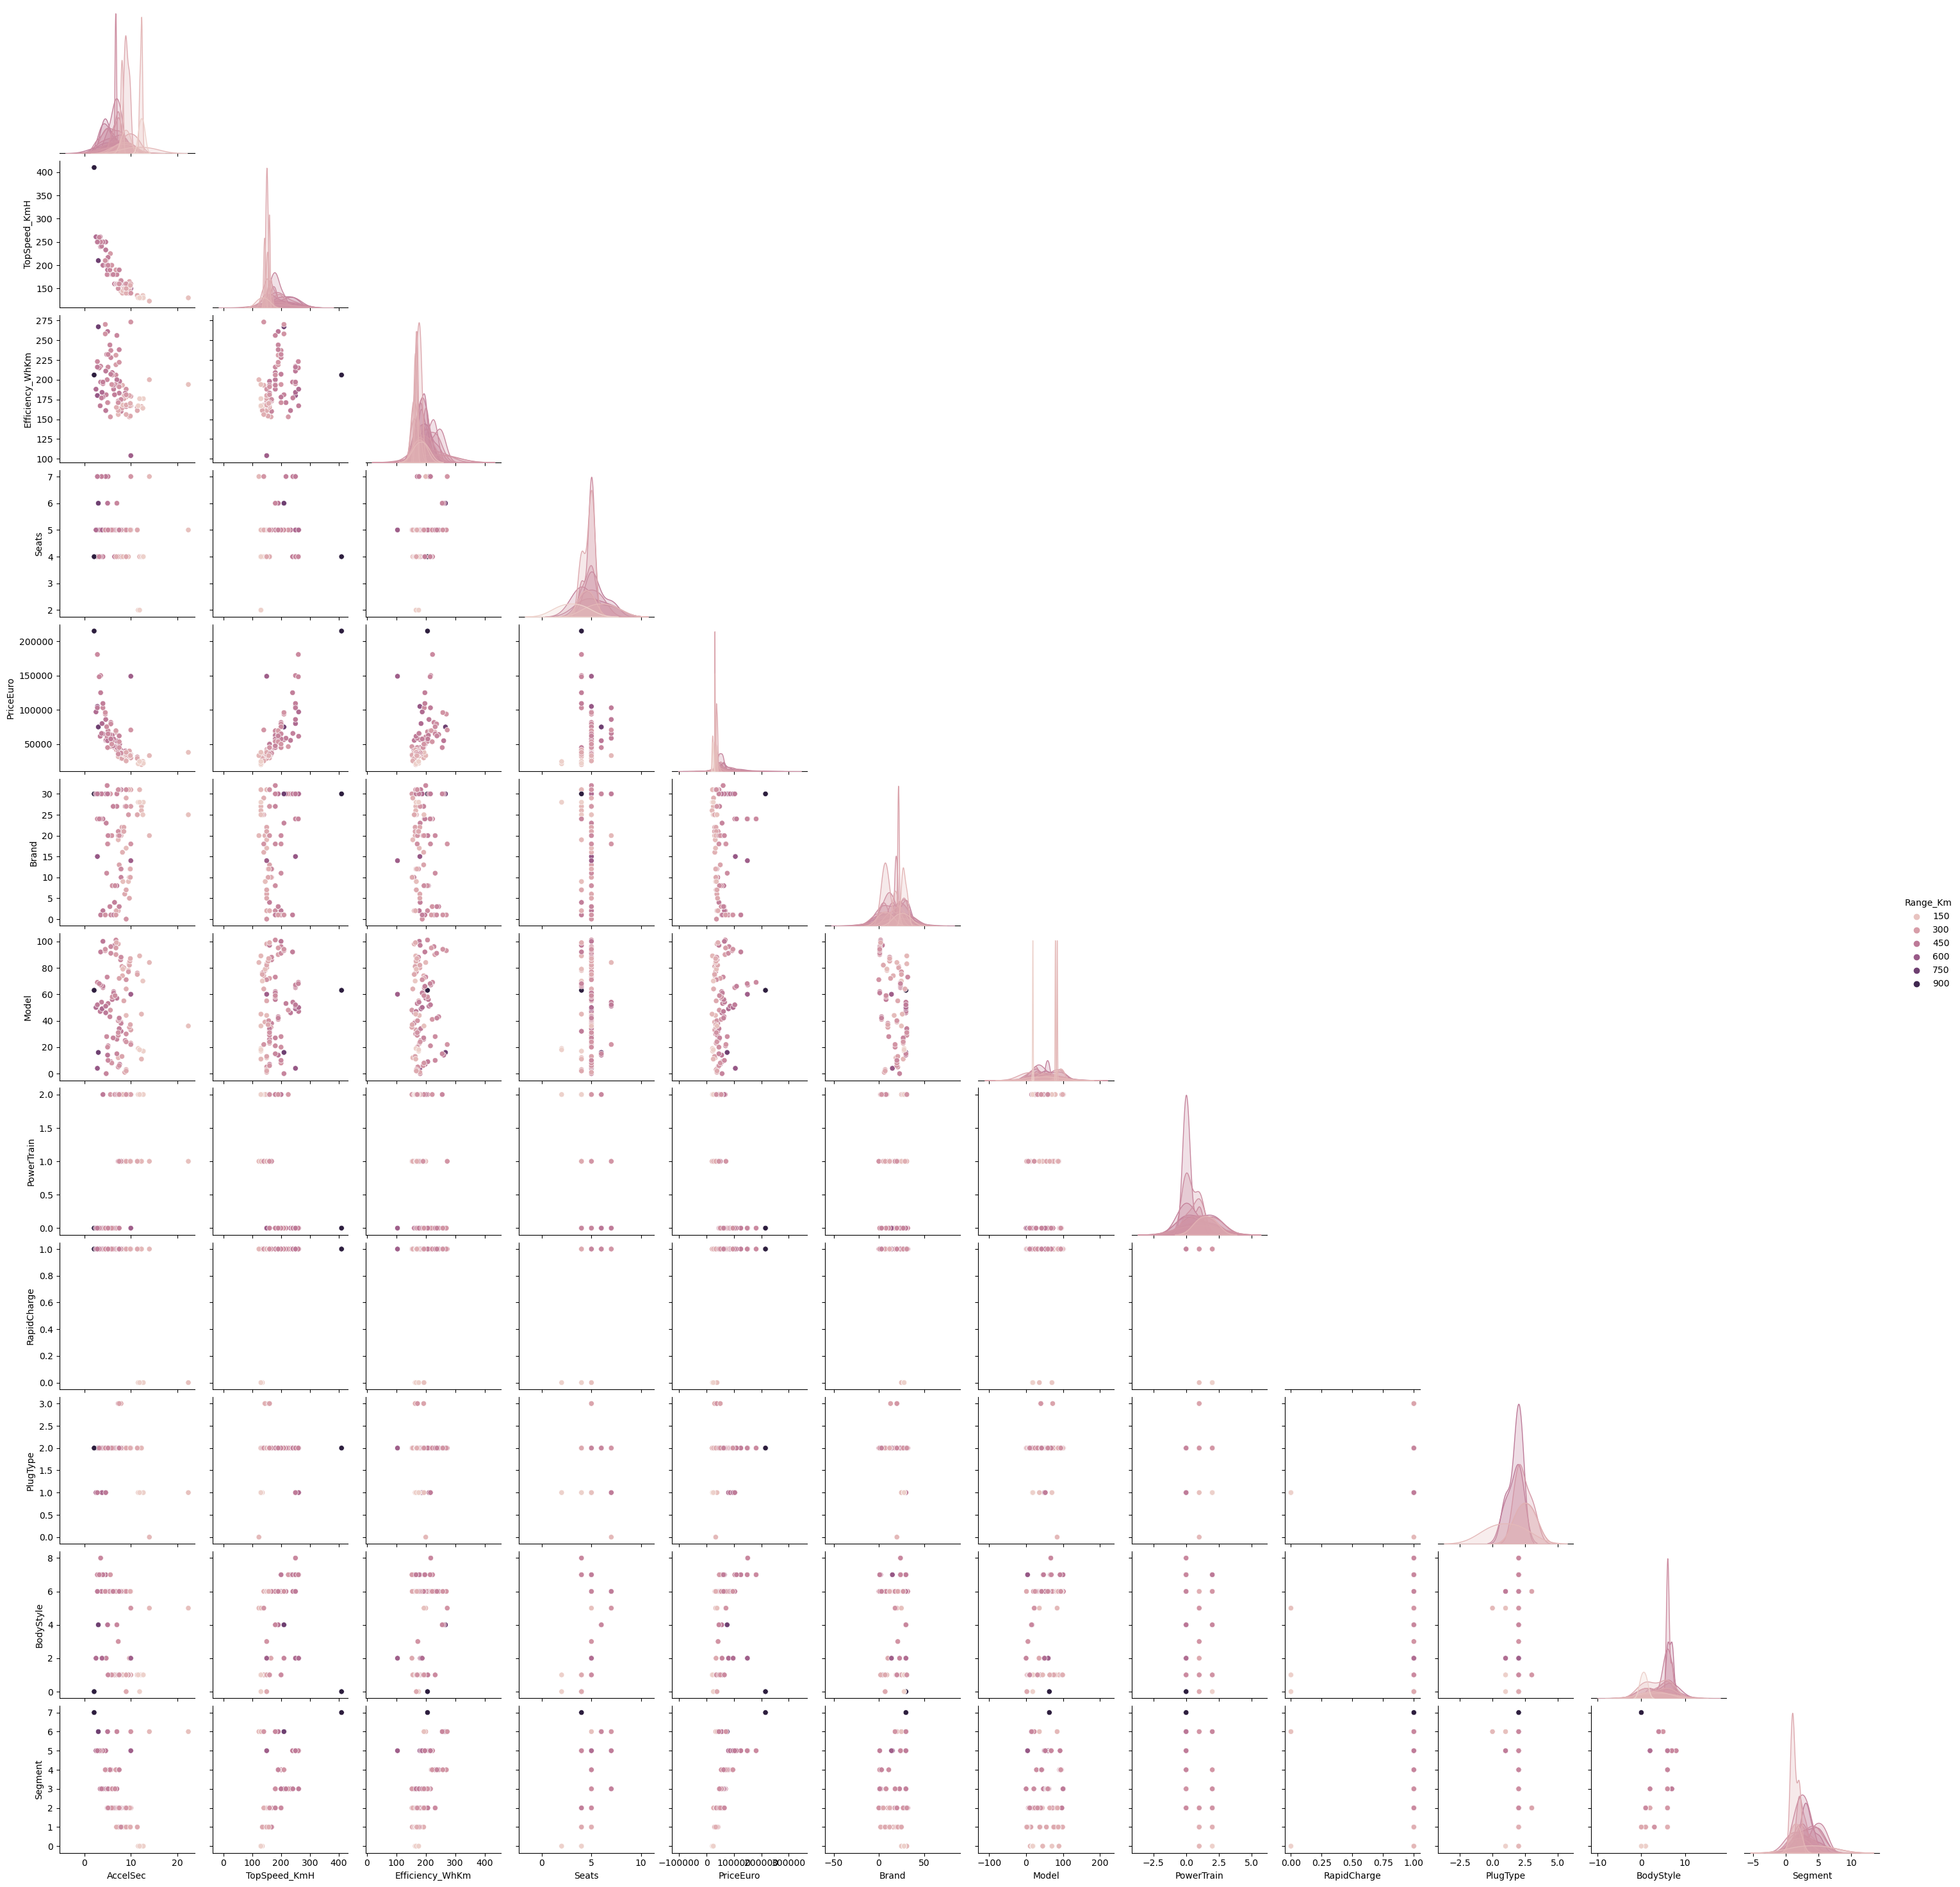

In [31]:
#Pairplot show the correlation of the data
sns.pairplot(ev,
             corner = True,
             kind = 'scatter',
             hue = 'Range_Km')
plt.show()

<AxesSubplot:>

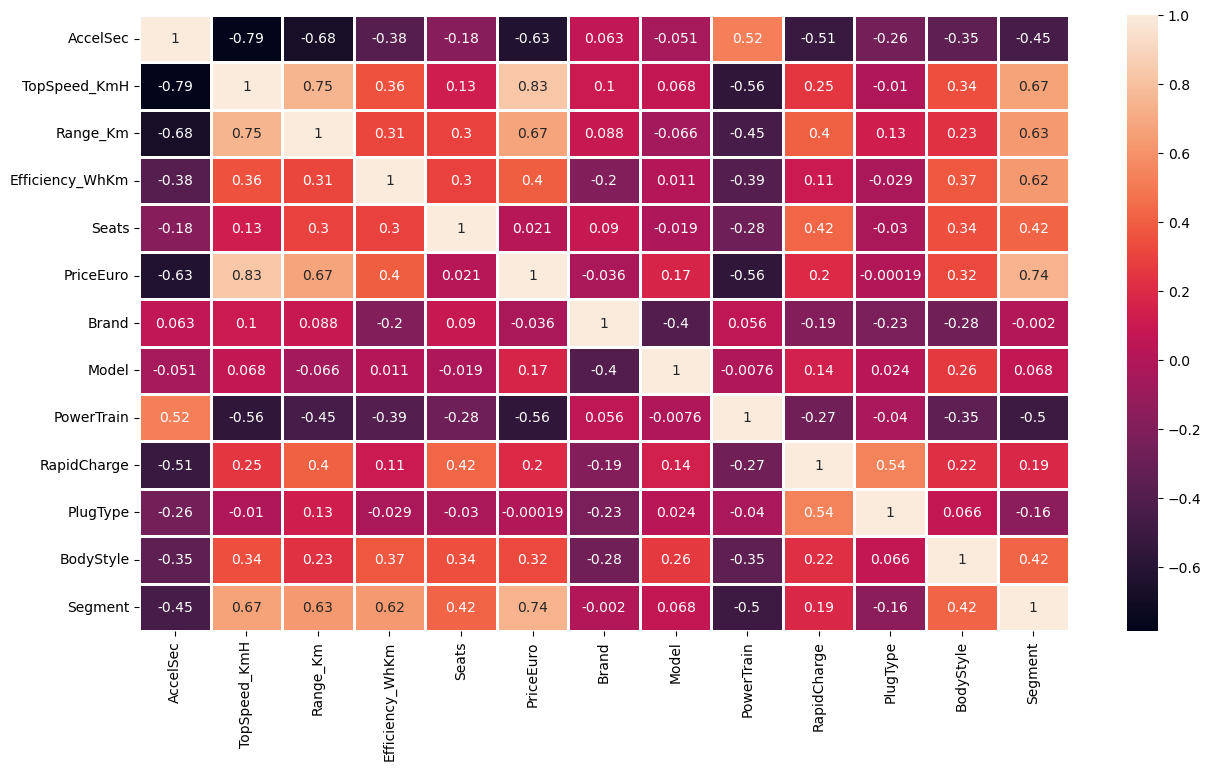

In [32]:
#Heatmap to show the correlation of the data
ax= plt.figure(figsize=(15,8))
sns.heatmap(ev.corr(),linewidths=1,linecolor='white',annot=True)

Electric Vehicle Range have strong positive correlation with Top Speed per Km driving. It might be sufficient to predit Electric Vehicle Range and then calculate range in Top Speed per Km.

Electric Vehicle Range have a strong negative correlation with Acceleration per second. 


# 4. Feature Selection

In [33]:
#Define the target value(dependant variable) as y
X = ev['TopSpeed_KmH'].values.reshape(-1,1)
y = ev['Range_Km']

# 5. Using Linear Regression Create a Model 

Linear Regression model is one of the most common algorithms for the regression task.

Strengths:

Simple implementation Linear Regression is a very simple algorithm that can be implemented very easily to give satisfactory results.

Performance on linearly seperable datasets Linear regression fits linearly seperable datasets almost perfectly and is often used to find the nature of the relationship between variable

Overfitting can be reduced by regularization Overfitting is a situation that arises when a machine learning model fits a dataset very closely and hence captures the noisy data as well.

Weaknesses:

Prone to underfitting Underfitting : A sitiuation that arises when a machine learning model fails to capture the data properly.This typically occurs when the hypothesis function cannot fit the data well.

Sensitive to outliers Outliers of a data set are anomalies or extreme values that deviate from the other data points of the distribution.

Linear Regression assumes that the data is independent Very often the inputs aren't independent of each other and hence any multicollinearity must be removed before applying linear regression.

Assumptions:

Linear relationship: There exists a linear relationship between the independent variable, x, and the dependent variable, y.

Independence: The residuals are independent. In particular, there is no correlation between consecutive residuals in time series data.

Homoscedasticity: The residuals have constant variance at every level of x.

Normality: The residuals of the model are normally distributed.

In [34]:
#Training and Test Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
## Check Shape, Sample of Test Train Data
print("X_train : ",X_train.shape)

print("X_test : ",X_test.shape)

print("y_train : ",y_train.shape)

print("y_test : ",y_test.shape)


X_train :  (82, 1)
X_test :  (21, 1)
y_train :  (82,)
y_test :  (21,)


In [36]:
# Create Linear Model
lr = LinearRegression()

#Model Fitting
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
#We can output a prediction
y_pred = lr.predict(X_test)
y_pred[0:5]

array([359.60303889, 359.60303889, 292.8263226 , 493.15647147,
       381.86194432])

Let's assume we have information of following EV

- AccelSec: 5.8
- TopSpeed_KmH: 248
- Efficiency_WhKm: 200
- FastCharge_KmH: 400
- PowerTrain: AWD
- PlugType: Type 2 CCS
- BodyStyle: Hatchback
- Range_Km: ?
- Seats: 5

In [38]:
#Predict the range of this EV using linear regression model.

# TopSpeed_Kmh = 248

EV_pred = lr.predict([[248]])
print(EV_pred)

[488.70469038]


We can predict the Range of this sample EV is 488 km. 

In [39]:
# Check Coefficient
lr.coef_

array([2.22589054])

In [40]:
#Check intercept
lr.intercept_

-63.3161642577993

Let's visualize Range as potential predictor variable of Top Speed

(0.0, 1013.75)

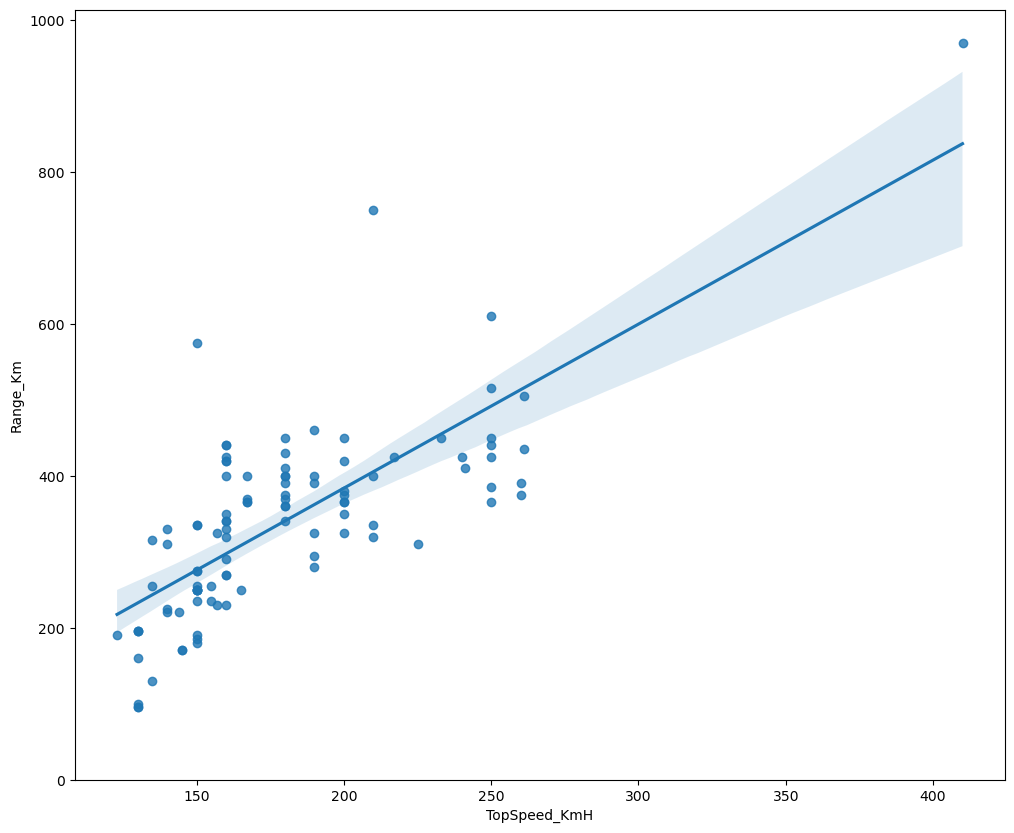

In [41]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="TopSpeed_KmH", y="Range_Km", data=ev)
plt.ylim(0,)

We can see from this plot that range is positively correlated to Top Speed per Kmh, since the regression slope is positive. If the slope is positive, y increases as x increases,  and the function runs "uphill". When Top_Speed increase, the Range will increase too. 

The fitted values for a linear regression model are the predicted values of the outcome variable for the data that is used to fit the model.


Let's look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values


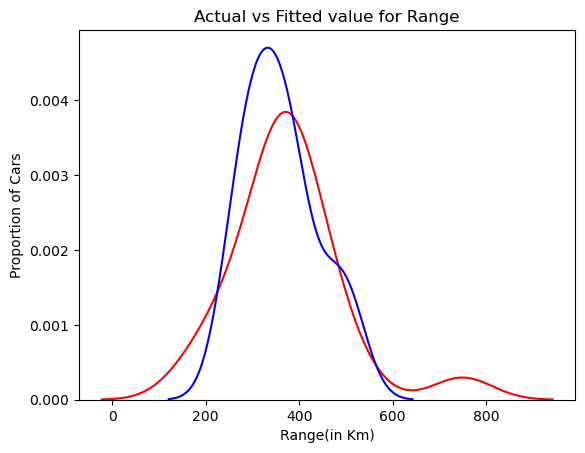

In [42]:
ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(y_pred, color="b", label="Fitted Values", ax=ax1)
plt.title('Actual vs Fitted value for Range')
plt.xlabel('Range(in Km)')
plt.ylabel('Proportion of Cars')
plt.show()
plt.close()


We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

# 6. Model Evaluation (Regression Metrics)

In [43]:
# Calculate the score for Training Data
lr.score(X_train, y_train)
print("R2 for Traing Data: ", lr.score(X_train, y_train))

R2 for Traing Data:  0.6297694922844455


In [44]:
# Calculate the score (R^2 for Regression) for Testing Data
lr.score(X_test, y_test)
print("R2 for Testing Data: ", lr.score(X_test, y_test))

R2 for Testing Data:  0.15363068038695216


In [45]:
#Calculate Mean Squared Error
mean_squared_error(y_test, y_pred)
print("MSE: ", mean_squared_error(y_test, y_pred))

MSE:  11242.893676247608


In [46]:
#Calculate Mean Absolute Error(MAE)
mean_absolute_error(y_test, y_pred)
print("MAE: ",mean_absolute_error(y_test, y_pred))

MAE:  78.18137850937941


In [47]:
#Calculate Root Mean Squared Error(RMSE)

print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  106.03251235469057


# 7. Use Forward Feature Selection to pick a good model

In [48]:
# Predictors
X = ev[['TopSpeed_KmH','Efficiency_WhKm','Segment','Seats','AccelSec','PriceEuro']]

In [49]:
# Target
y = ev['Range_Km']

In [50]:
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Create a Regression model using Forward Feature Selection by looping over all the features adding one at a time until there are no improvements on the prediction metric ( R2 and AdjustedR2 in this case).

In [51]:
## Flag intermediate output

show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

# Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the training data
n = X_train.shape[0]

r2_list = []
adjusted_r2_list = []

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )
        
        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for
    
    r2_list.append(best['r2'])
    adjusted_r2_list.append(best['a_r2'])

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = TopSpeed_KmH, PriceEuro, AccelSec, Segment, Efficiency_WhKm, Seats
(Step) Trying TopSpeed_KmH...
(Step) - Features = TopSpeed_KmH
(Step) - Adjusted R^2: This = 0.625; Best = 0.000
(Step) - New Best!   : Feature = TopSpeed_KmH; R^2 = 0.630; Adjusted R^2 = 0.625
(Step) Trying PriceEuro...
(Step) - Features = PriceEuro
(Step) - Adjusted R^2: This = 0.549; Best = 0.625
(Step) Trying AccelSec...
(Step) - Features = AccelSec
(Step) - Adjusted R^2: This = 0.452; Best = 0.625
(Step) Trying Segment...
(Step) - Features = Segment
(Step) - Adjusted R^2: This = 0.382; Best = 0.625
(Step) Trying Efficiency_WhKm...
(Step) - Features = Efficiency_WhKm
(Step) - Adjusted R^2: This = 0.064; Best = 0.625
(Step) Trying Seats...
(Step) - Features = Seats
(Step) - Adjusted R^2: This = 0.055; Best = 0.625
Added feature TopSpeed_KmH with R^2 = 0.630 and adjusted R^2 = 0.625

(Step) Excluded = AccelSec, Segment, PriceEuro, Efficiency_WhKm, Seats
(Step) Trying AccelSec...
(Step) - Features = 

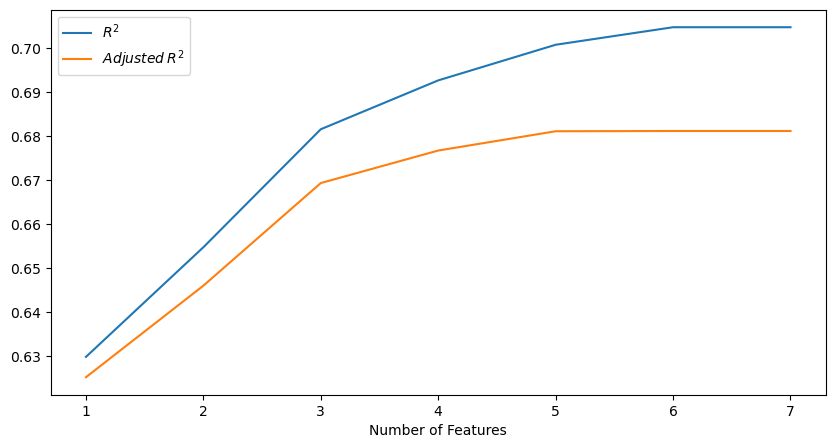

In [52]:
## Display both R^2 and Adjusted R^2

_range = range(1, len(r2_list)+1)

# define chart size
plt.figure(figsize = (10, 5))
# plot each metric 
plt.plot(_range, r2_list, label = '$R^2$')
plt.plot(_range, adjusted_r2_list, label = '$Adjusted \: R^2$')
# add some better visualisation
plt.xlabel('Number of Features')
plt.legend()
# output the chart
plt.show()

I can improve R2 by selecing different features. Every time we add an independent variable to a model then the R-squared increases.

# 8. Regularisation

Linear regression works by selecting coefficients for each independent variable that minimizes a loss function. However, if the coefficients are too large, it can lead to model over-fitting on the training dataset.

The two most common types of regularization are the Ridge and Lasso.

In [53]:
#Create a Base Model Using Linear Regression
model = LinearRegression()
# Fit
model.fit(X,y)

LinearRegression()

In [54]:
# Check Coeffiricent
model.coef_

array([ 7.47717179e-01, -6.22509843e-01,  1.65787415e+01,  2.57670219e+01,
       -1.24305613e+01,  6.04144393e-04])

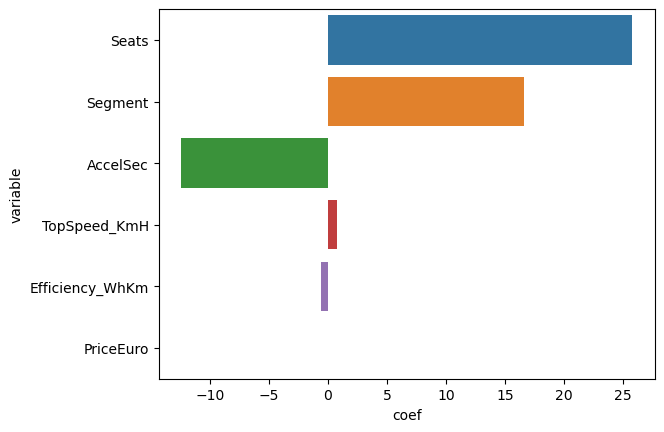

In [55]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="coef", y="variable", data=model_coefs)
# Plot Coefficients
view_coeff(X, model)

# 9. Calculate Ridge Regression model

In [56]:
## Calculate Ridge Regression model

# create a model object to hold the modelling parameters
ridgemodel = Ridge()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200) #lambda in the slides

# Train the model with different regularisation strengths
for a in ridge_alphas:
    ridgemodel.set_params(alpha = a)
    ridgemodel.fit(X, y)
    coefs.append(ridgemodel.coef_)
    errors.append(mean_squared_error(ridgemodel.coef_, model.coef_))

Visual Representation of Coefficient of Ridge Model

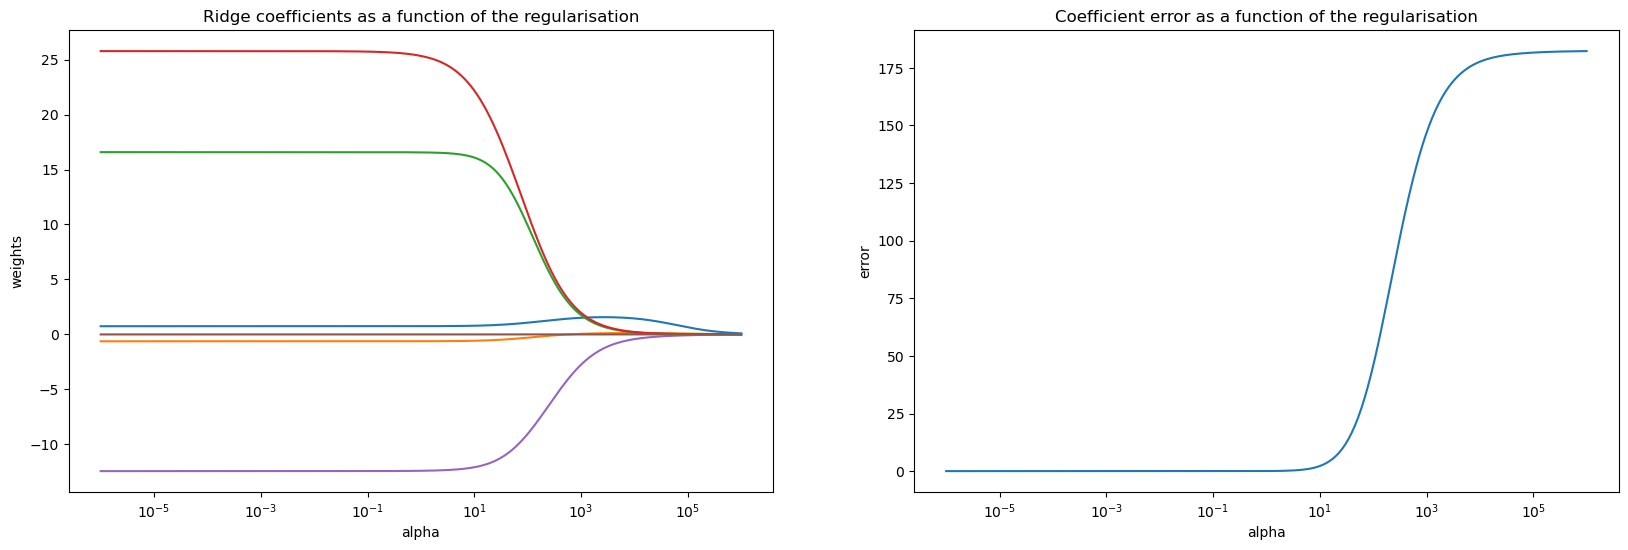

In [57]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

Find an optimal value for Ridge regression alpha using RidgeCV

In [58]:
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X, y)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X, y))

Alpha: 19.791668678535572
Score: 0.6467904685229368


In [59]:
optimal_ridge.coef_

array([ 8.33733337e-01, -5.29343039e-01,  1.53156424e+01,  1.97312130e+01,
       -1.16862263e+01,  5.71635752e-04])

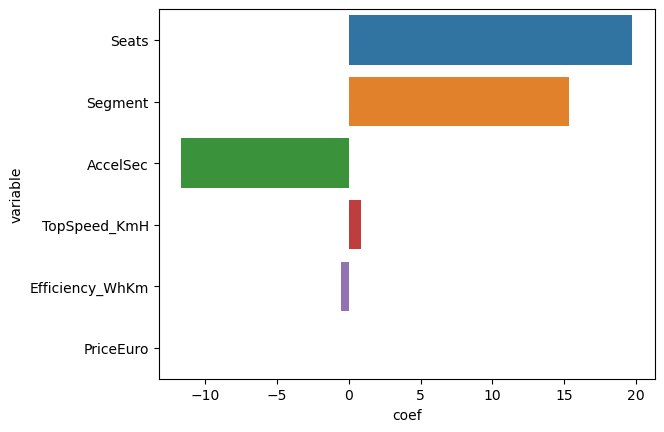

In [60]:
# Plot Coefficient
view_coeff(X, optimal_ridge)

In [61]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

68.50082915686325
0.7047900146524513
98.54263271897918
0.26897853326748533


The above output shows that the RMSE and R-squared values for the Ridge Regression model on the training data is 68.5 and 70.48 percent, respectively. For the test data, the result for these metrics is 98.54 and 26.9 percent, respectively.

# 10. Calculate Lasso Regression model

In [62]:
## Calculate Lasso Regression model

# create a model object to hold the modelling parameters
lassomodel = Lasso()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
lasso_alphas = np.logspace(-6, 6, 200) #lambda in the slides

# Train the model with different regularisation strengths
for a in lasso_alphas:
    lassomodel.set_params(alpha = a)
    lassomodel.fit(X, y)
    coefs.append(lassomodel.coef_)
    errors.append(mean_squared_error(lassomodel.coef_, model.coef_))

Visual Representation of Coefficient of Lasso Model

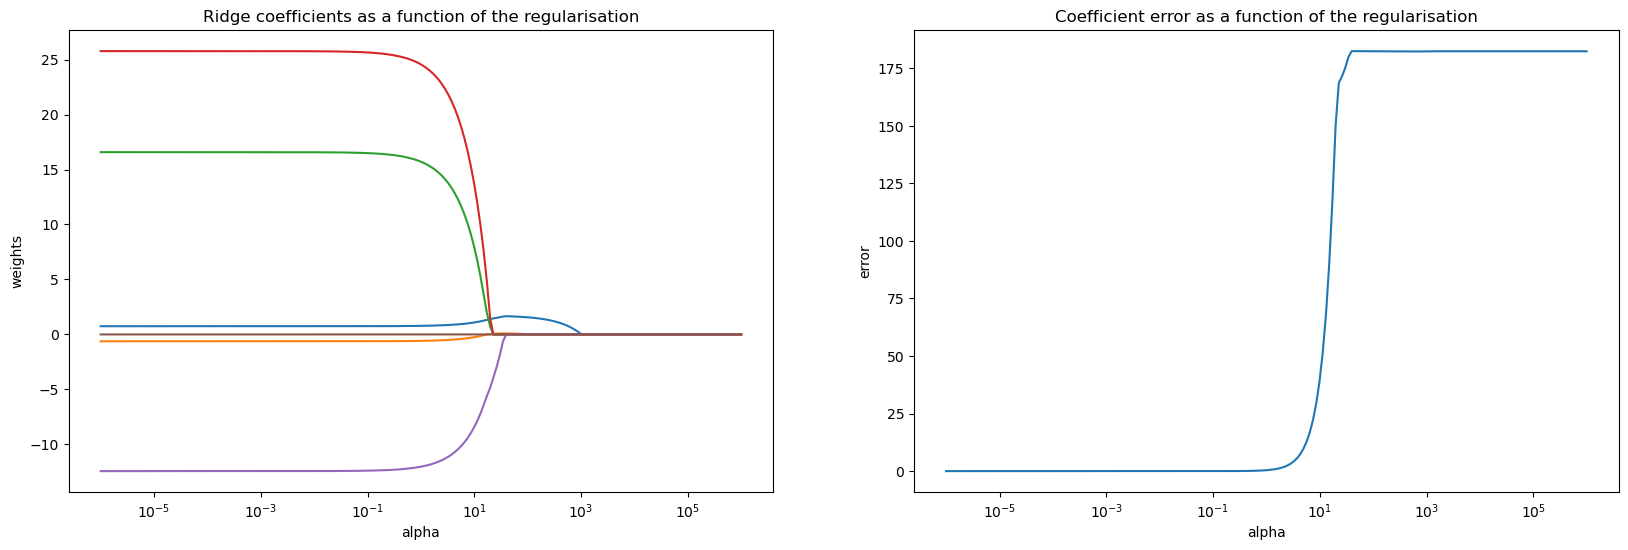

In [63]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(lasso_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(lasso_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

Find an optimal value for Lasso regression alpha using LassoCV.

In [64]:
# Find Optimal Lasso Using LassoCV

# create a model object to hold the modelling parameters
optimal_lasso = LassoCV(alphas=lasso_alphas, cv=10)

optimal_lasso.fit(X, y)
print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(X, y))

Alpha: 482.41087041653736
Score: 0.5423596191706892


In [65]:
optimal_lasso.coef_

array([ 0.91176137,  0.        ,  0.        ,  0.        , -0.        ,
        0.00152598])

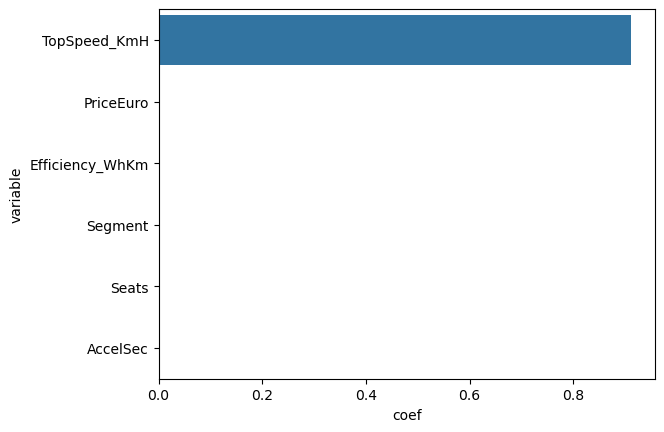

In [66]:
# Plot Coefficient
view_coeff(X, optimal_lasso)

In [67]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

68.5008306844336
0.7047900014860699
98.54843710334595
0.26889241308942313


The above output shows that the RMSE and R-squared values for the Lasso Regression model on the training data is 68.5 and 70.5 percent, respectively. The results for these metrics on the test data is 98.5 and 26.89 percent, respectively. Lasso Regression can also be used for feature selection because the coeﬃcients of less important features are reduced to zero.

Compare the residuals for the Ridge and Lasso visually.

In [68]:
# Ridge model residuals
optimal_ridge.fit(X_train, y_train)
prediction = optimal_ridge.predict(X_test)
residual_ridge = (y_test - prediction)
print(residual_ridge)

31     -80.653722
68     120.792391
63     135.718933
48    -117.533883
43     -14.067880
41      67.909563
91    -100.717517
46      72.637466
11      15.012017
1       57.864079
19     -32.057118
32      75.420670
98     -14.274991
86     -21.932045
77      72.053241
5      -93.644847
80    -173.389035
34     358.472251
13     100.226171
27      70.433793
101    -21.412395
Name: Range_Km, dtype: float64


In [69]:
# Lasso model residuals
optimal_lasso.fit(X_train, y_train)
prediction = optimal_lasso.predict(X_test)
residual_lasso = (y_test - prediction)
print(residual_lasso)

31     -83.715045
68     113.593859
63     136.640227
48    -120.645532
43     -15.731764
41      61.505778
91    -104.779162
46      71.666541
11      15.321647
1       51.259567
19     -31.318471
32      74.890551
98     -19.305206
86     -20.195942
77      72.106718
5      -91.523348
80    -171.186623
34     351.552557
13     101.122874
27      70.450825
101    -26.417441
Name: Range_Km, dtype: float64


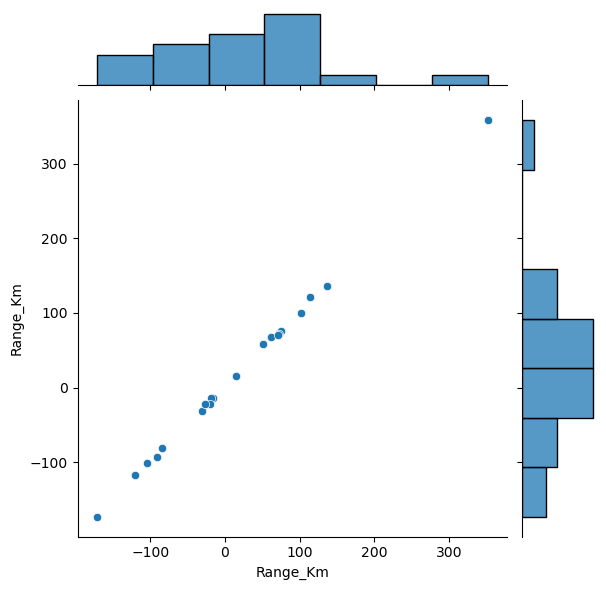

In [70]:
# Jointplot

sns.jointplot(data=ev, x=residual_lasso, y=residual_ridge, kind = 'scatter')


# Conclusions

From my analysis, affect EV Range Factors are TopSpeed_KmH, Efficiency_WhKm, AccelSec, Segment, Seats and PriceEuro.

There are a number of factors that also affect EV range:
    
- Your driving style

- Terrain and road condition

- The weather

- The weight of the vehicle

- Using the heating and air conditioning

- Condition of the tyres

- Condition of the battery


Tips to Maximize Range (Example for EV car - Tesla Model Y)

- Slow down your driving and avoid frequent and rapid acceleration.

- If safe to do so, modulate the accelerator pedal instead of using the brake pedal when gradually slowing down.

- Limit the use of resources such as heating and air conditioning. 

-  With your vehicle plugged in, use the mobile app to precondition your vehicle to ensure the cabin is at a comfortable temperature and windows are defrosted (if needed) before your drive 

- Touch Schedule, available on both the charging and climate control screens, to set a time when you want your vehicle to be ready to drive

- Set Stopping Mode to Hold to gain the benefit of regenerative braking at low driving speeds

- Ensure the wheels are aligned to specification, the tires are kept at the recommended inflation pressures (see Tire Care and Maintenance), and are rotated when needed

- Install aero covers (if equipped) to reduce wind resistance 

- Lighten your load by removing any unnecessary cargo.

- Fully raise all windows.

- Features such as Sentry Mode and Cabin Overheat Protection can impact range. Disable features when not needed.

- To prevent an excessive amount of energy consumption while the vehicle is idle, keep the vehicle plugged in when not in use.

- Minimize the use of DC chargers (such as Superchargers) for optimal Battery health.

Reference from: 

https://www.tesla.com/ownersmanual/modely/en_kr/GUID-4AC32116-979A-4146-A935-F41F8551AFE6.html

https://iq.opengenus.org/advantages-and-disadvantages-of-linear-regression/

https://www.statology.org/linear-regression-assumptions/

Datasets Reference :  

https://www.kaggle.com/datasets/geoffnel/evs-one-electric-vehicle-dataset